## K Nearest Neighbours : Regression  Problem

## Part 3









## Part 3-A - 
* **Modify the distance weighted KNN code in PART 2 to solve a Regression Problem.And generate accuracy using R^2 method.**

Max Accuracy for Regressor =85.06560730414083


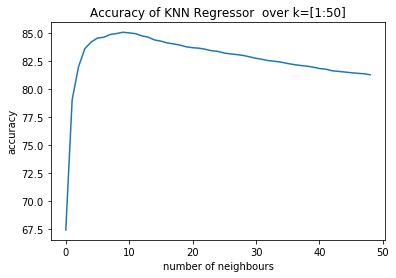

In [4]:
import numpy as np
import matplotlib.pyplot as plt


class KNearestNeighbours:
    def __init__(self, __trainingDataFile, __testDataFile):
        self.weight = 10000
        self.trainingDataFile = __trainingDataFile
        self.testDataFile = __testDataFile
        self.trainingData = np.array([])
        self.testData = np.array([])
        self.euclideanDistances = np.array([])
        self.euclideanDistancesSorted = np.array([])
        self.readInstances()

    def readInstances(self):

        self.trainingData = np.genfromtxt(self.trainingDataFile, delimiter=',', dtype=float)
        self.testData = np.genfromtxt(self.testDataFile, delimiter=',', dtype=float)

    def viewData(self):
        self.updateDistances()
        
        
    '''Calculates the distance between each training set instance and Target Test Instance  '''     
    def calculateDistances(self, trainingInstancesMatrix, singlQueryPoint):
        data = np.sqrt(np.sum((trainingInstancesMatrix - singlQueryPoint) ** 2, axis=1))
        sorted_data = np.argsort(data)
        return data, sorted_data

    def updateDistances(self):
        distances = []
        sortedDistances = []
        for i in range(0, np.shape(self.testData)[0]):
            d, sd = self.calculateDistances(self.trainingData[:, :-1], self.testData[i, :-1])
            distances.append(d)
            sortedDistances.append(sd)
            i += 1
        self.euclideanDistances = np.array(distances)
        self.euclideanDistancesSorted = np.array(sortedDistances)

    '''Predict the value for each test instance'''
    def generate_pred_for_regression_problem(self, results, euclidean_distance_of_neighbours):

        invsquared_eucl_distance_bet_neighbours = 1 / np.square(euclidean_distance_of_neighbours)

        predicted_value = np.sum(invsquared_eucl_distance_bet_neighbours * results) / np.sum(
            invsquared_eucl_distance_bet_neighbours)
        return predicted_value

    '''Calculate the accuracy based on the R^2 method'''
    def calculate_accuracy_for_Reg_prob(self, expected_results, predicted_results):

        num = np.sum(np.square(predicted_results - expected_results))
        deno = np.sum(np.square(np.average(expected_results) - expected_results))
        final_accuracy = 1 - (num / deno)
        return final_accuracy * 100

'''**********************************************Do your Configurations Here *******************************************************************************'''
kNearestNeighbours = KNearestNeighbours("data/regression/trainingData.csv", "data/regression/testData.csv")
kNearestNeighbours.viewData()
'''**********************************************************************************************************************************************************'''
# Select the number of neighbours
k_list = range(1, 50)
accuracy_list = []
for k in k_list:

    '''where the prediction result of each test instance will be stored'''
    predicted_results = []
    predicted_results_for_Reg_problems = []

    '''Find the euclidean distance from each instance in test data and find the nearest train instances'''
    for indexToBe_searched in range(np.shape(kNearestNeighbours.testData)[0]):
        list_of_neighbours = kNearestNeighbours.euclideanDistancesSorted[indexToBe_searched][:k]
        results = []
        euclidean_distance_of_neighbours = []
        for neighbour in list_of_neighbours:
            result = kNearestNeighbours.trainingData[neighbour][-1:]

            '''Find the distances between the target instance and the neighbours'''
            euclidean_distance_of_neighbour = kNearestNeighbours.euclideanDistances[indexToBe_searched][neighbour]

            '''Find the result for each neighbour'''
            results.append(float(result))

            euclidean_distance_of_neighbours.append(float(euclidean_distance_of_neighbour))

        '''predict the result based on majority'''
        predicted_results_for_Reg_problems.append(
            [kNearestNeighbours.generate_pred_for_regression_problem(np.array(results), np.array(euclidean_distance_of_neighbours))])

    '''Append the obtained prediction results to the test data for convenience'''
    final_test_result = np.append(kNearestNeighbours.testData, predicted_results_for_Reg_problems, axis=1)
    
    '''Calculating the accracy'''
    accuracy_for_Reg_prob = kNearestNeighbours.calculate_accuracy_for_Reg_prob(final_test_result[:, [-2]], final_test_result[:, [-1]])
    accuracy_list.append(accuracy_for_Reg_prob)
print('Max Accuracy for Regressor ={}'.format(max(accuracy_list)))

'''Plotting the accuracy of the Regressor over multiple value of K '''
plt.plot(accuracy_list)
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')
plt.title('Accuracy of KNN Regressor  over k=[1:50]')
plt.show()




* Below is the performance of The KNN regressor over k from 1 to 50

<img src="https://www.dropbox.com/s/mpua9zuorqk0ub6/performance_KNN_regressor.png?raw=1" alt="data1" border="0">

##  Part 3-B 
* Explain why equal contribution from Irrelavant or Insignificant variable might cause a Negative impact on the performance of KNN and ways to counter it.

*  While working with KNN or any other machine learning algorithm it is important that the data is pre processed.
Below are the two very important acpects of pre processing.
    * Standarization:
    * Normalization:

* The above two become very critical while implementing KNN algorithm using Euclidean Distance. Below is the formula which is used for calculating Euclidean distance.

* **What happens here ?**
    * Lets us say every instance in your training and test set as 10 features.All you have to do it to calcualte the distance between Instance1(feature1) and Instance2(feature1) and so on ,for every feature in both the instances.
    
    * It is quite possible that some of the features in your data might be statistically very significant however some are not very significant.
    
    * However , Euclidean distance assumes that each feature in your data set is statistically equally important.This has its own ramifications, in the predicted class these statiscally insignnificant features get greater representation while determining the final predicated value(assuming we are solving a regression problem).
    
    
 
* How to address this ?
    * Firstly **standarize** the data to turn the data in to **guassian distribution.**
    
    * Secondly, **normalize** the data in **between a 0-1 scale** so that the larger numbers do not dominate the smaller ones.    eg. So that Salary does not dominate height in cms
    
    * Thirdly,it is now important to identify the staistically sihgnificant and statiscally insignificant features.
    * **This can be done using **Backward Elimination** technique.**
    
* Backward Elimination.


* **Standardization.**
    * Standardization is the process of rescaling the features so that they will have Guassian Distribution                     with mean=0 and standard deviation=1
      calculated as :
                   new value = feature-mean/standard deviation

* **Normalization**
    * Normalization is also called as min-max scaling.Where in also the features are converted into a range of 0  to 1 (sometimes -1 to 1 ) 
    * **Drawback**: Normalization is sensitive to outliers. So outliers must be removed before applying normalization.
    

In [5]:
'''Below is the code for standardization'''
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

train = pd.read_csv("data/regression/trainingData.csv",delimiter=',',header= None)  # load train data
test = pd.read_csv("data/regression/testData.csv",delimiter=',',header= None)  # load test data
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

'''Standarize the features in training and test set'''
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsRegressor(n_neighbors=10, n_jobs=4)
model.fit(X_train, y_train)
predict=model.predict(X_test)
r2_score(y_test,predict)

0.8480139294676208

Below Methods can be used to eliminate statistically  insignificant features that influence the results.

1. Kselectbest
2. Backward Elimination

We shall discuss **Backward Elimination** as a way ahead.

* **Backward Elimination**

* it a process of eliminating the features that are reported to be beyond the pre dicided bench mark(P value)

* What is **p-value**?
     This number defines how probable is it to not get the next result close to the current one.This video clearly explains 
    the concept.Basically it shows the level of confidence you have for that result to fail. The lesser the better.
    
* **Backward eliminnation in 4 simple steps:**
        1.Select a significance level(p-value=5)
        2.Fit a model with all features.
        3.Consider the feature with higest p value.
        4.Eliminate that feature.
        5.Fit the modelwith the new features.Continue until all features are below the p value.
        

* Below is the code for Backward Elimination
    * Below OLS[Ordinary Least Square] can be used to evaluate the accuracy using the summary method and repeated untill all the variables above the p value are eliminated.

In [7]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

train = pd.read_csv("data/regression/trainingData.csv",delimiter=',',header= None)  # load train data
test = pd.read_csv("data/regression/testData.csv",delimiter=',',header= None)  # load test data
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]
model = KNeighborsRegressor(n_neighbors=10, n_jobs=4)
model.fit(X_train, y_train)
predict=model.predict(X_test)
r2_score(y_test,predict)

import numpy as np
X_train = np.append (arr=np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)

import statsmodels.formula.api as sm
X_opt = [0,1,2,3,4,6]
regressor = sm.OLS(y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                     12   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8566
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.510
Time:                        15:33:12   Log-Likelihood:                -41899.
No. Observations:                6400   AIC:                         8.381e+04
Df Residuals:                    6394   BIC:                         8.385e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1885      2.110     -0.089      0.9

In [12]:
dataframe(X_train)

NameError: name 'dataframe' is not defined

In [8]:
X_opt_new = [0,1,2,4,6]
regressor = sm.OLS(y_train, X_train[:,X_opt_new]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                     12   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2397
Date:                Thu, 12 Dec 2019   Prob (F-statistic):              0.916
Time:                        15:33:16   Log-Likelihood:                -41900.
No. Observations:                6400   AIC:                         8.381e+04
Df Residuals:                    6395   BIC:                         8.384e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2330      2.110     -0.110      0.9

In [9]:
model = KNeighborsRegressor(n_neighbors=10, n_jobs=4)
model.fit(X_train[:,X_opt_new], y_train)
predict=model.predict(X_test[:,X_opt_new])
r2_score(y_test,predict)

TypeError: '(slice(None, None, None), [0, 1, 2, 4, 6])' is an invalid key